# Day Four: Grouping and Visualization

As always, import pandas using the conventional alias `pd` and check the version. Any version should > 2.0 should do.

In [1]:
import pandas as pd
print(pd.__version__)

2.2.3


Let's make a quick adjustment so that Pandas displays all the columns in this DataFrame.

In [2]:
pd.set_option('display.max_columns', None)

## Reading Data into Pandas from the Internet

Let's talk about reading in files from the internet. Our next dataset the Programming Language Database, is hosted online, and we will be reading it in from a URL rather than downloading to our local filesystem.

The Programming Language Database (PLDB) is a comprehensive database of programming languages and their common features with a popularity ranking algorithm.

You can find more information about this data in the `resources.md` file.

This dataset is quite large! We know this dataset is ranked, so let's say we want to work with the top 500 (or first 500) programming languages and the first 20 columns.
This requires to use yesterday's `.iloc[]`.
We'll also index the DataFrame by passing in the `index_col` argument.

In [3]:
pldb = pd.read_csv("https://pldb.io/pldb.csv",index_col="id", low_memory=False).iloc[:500, :20]
pldb

,name,appeared,creators,maintainers,measurements,tags,rijuRepl_website,website,spec,foundationScore,blog,releaseNotes,download,latestVersion,exampleCount,rank,lastActivity,writtenInCount,pldbScore,meetup_memberCount
id,,,,,,,,,,,,,,,,,,,,
javascript,JavaScript,1995,Brendan Eich,NaN,144,pl,NaN,NaN,https://ecma-international.org/publications-an...,524,NaN,NaN,NaN,es14,5,1,NaN,NaN,25372,3151948.0
c,C,1972,Dennis Ritchie,NaN,99,pl,NaN,NaN,https://www.iso-9899.info/wiki/The_Standard,404,NaN,NaN,NaN,C17,5,2,NaN,NaN,25350,69338.0
python,Python,1991,Guido van Rossum,NaN,120,pl,https://www.python.org/,https://www.python.org/,https://docs.python.org/3/reference/,393,NaN,https://docs.python.org/3/whatsnew/,https://www.python.org/downloads/,3.13.0,3,3,NaN,32.0,25350,1424303.0
java,Java,1995,James Gosling,NaN,109,pl,NaN,https://openjdk.org/,https://docs.oracle.com/javase/specs/,142,https://blogs.oracle.com/java/,https://openjdk.org/projects/jdk-updates/,https://www.oracle.com/java/technologies/downl...,20,6,4,NaN,34.0,25340,1162766.0
cpp,C++,1985,Bjarne Stroustrup,NaN,79,pl,NaN,http://isocpp.org/,https://isocpp.org/std/the-standard,293,https://www.isocpp.org/blog,https://en.cppreference.com/w/cpp/language/his...,NaN,C++20,6,5,NaN,NaN,25329,69338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dat-protocol,dat-protocol,2013,Max Ogden,NaN,14,protocol,NaN,https://dat.foundation/,NaN,0,NaN,NaN,NaN,14.0.3,0,496,NaN,6.0,23335,NaN
mariadb,MariaDB,2009,NaN,NaN,16,queryLanguage,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,497,NaN,NaN,23330,NaN
sourcepawn,SourcePawn,2014,NaN,NaN,24,pl,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,498,NaN,14.0,23325,NaN


Because we have an index column, we can grab rows by their `id`. These ids are intuitive: a standardized form of the name of the programming language.

In [4]:
pldb.index

Index(['javascript', 'c', 'python', 'java', 'cpp', 'html', 'css', 'perl',
       'php', 'ruby',
       ...
       'xtext', 'curl', 'fancy', 'lfe', 'clips', 'dat-protocol', 'mariadb',
       'sourcepawn', 'io', 'qalb'],
      dtype='object', name='id', length=500)

## Manipulating DataFrames

Sometimes we want to change values in DataFrames in a systematic way. Let's start with creation new columns as a function of **other columns**. 

Operations on Series are vectorized. That means they are applied to each individual entry in the Series in parallel. Let's look at the numeric column `"appeared`", which is the date 

In [5]:
pldb["appeared"]

id
javascript      1995
c               1972
python          1991
java            1995
cpp             1985
                ... 
dat-protocol    2013
mariadb         2009
sourcepawn      2014
io              2002
qalb            2012
Name: appeared, Length: 500, dtype: int64

One way to manipulate a **Series** is to add a constant.

In [6]:
pldb["appeared"] + 2000 # This is shorthand for adding 20 to each value in the Series

id
javascript      3995
c               3972
python          3991
java            3995
cpp             3985
                ... 
dat-protocol    4013
mariadb         4009
sourcepawn      4014
io              4002
qalb            4012
Name: appeared, Length: 500, dtype: int64

In [7]:
pldb["appeared"] * 0.5 # Multiply each value by 0.5

id
javascript       997.5
c                986.0
python           995.5
java             997.5
cpp              992.5
                 ...  
dat-protocol    1006.5
mariadb         1004.5
sourcepawn      1007.0
io              1001.0
qalb            1006.0
Name: appeared, Length: 500, dtype: float64

Unlike *aggregation* functions, vectorized operations return a Series or DataFrame of the same size. For example, remember `.min()` and `.max()`?

In [8]:
pldb["appeared"].max() # This will return one value, it aggregates

2024

The plus symbol as applied to a Series of type Object (string) and a string *concatenates* the string to each item in the Series.

In [9]:
"dog" + "cat" #string concatenation

'dogcat'

In [10]:
pldb["creators"] + " and Abraham Lincoln" # concatenates and Abraham lincoln to each item in a Series

id
javascript           Brendan Eich and Abraham Lincoln
c                  Dennis Ritchie and Abraham Lincoln
python           Guido van Rossum and Abraham Lincoln
java                James Gosling and Abraham Lincoln
cpp             Bjarne Stroustrup and Abraham Lincoln
                                ...                  
dat-protocol            Max Ogden and Abraham Lincoln
mariadb                                           NaN
sourcepawn                                        NaN
io                  Steve Dekorte and Abraham Lincoln
qalb                Ramsey Nasser and Abraham Lincoln
Name: creators, Length: 500, dtype: object

Unary functions can also be vectorized on **Series**. For example, we can use the **np.sqrt()** function and other vectorized **np** [https://numpy.org/doc/2.1/reference/routines.math.html] mathematical functions.

In [11]:
import numpy as np
np.sqrt(pldb["measurements"])

id
javascript      12.000000
c                9.949874
python          10.954451
java            10.440307
cpp              8.888194
                  ...    
dat-protocol     3.741657
mariadb          4.000000
sourcepawn       4.898979
io               6.244998
qalb             4.472136
Name: measurements, Length: 500, dtype: float64

## Operations on Multiple Series

We can also make new **Series** through operations on two **Series** of the same length. 

The plus operation on two string **Series** of the same length concatenates.

In [12]:
pldb["name"] + pldb["website"]

id
javascript                                      NaN
c                                               NaN
python                Pythonhttps://www.python.org/
java                       Javahttps://openjdk.org/
cpp                           C++http://isocpp.org/
                               ...                 
dat-protocol    dat-protocolhttps://dat.foundation/
mariadb                                         NaN
sourcepawn                                      NaN
io                        Iohttps://iolanguage.org/
qalb             Qalbhttp://qlb-repl.herokuapp.com/
Length: 500, dtype: object

In [13]:
pldb["measurements"] + pldb["rank"]

id
javascript      145
c               101
python          123
java            113
cpp              84
               ... 
dat-protocol    510
mariadb         513
sourcepawn      522
io              538
qalb            520
Length: 500, dtype: int64

Let's say we want to scale the "pldbScore" column between 0 and 1.
An easy way to do this is to subtract the minimum value of the column from each value, then divide by the minimum value minus the maxmimum value.
Let's start from computing the mins and maxes.

In [14]:
score_min = pldb["pldbScore"].min()
score_max = pldb["pldbScore"].max()
score_range = score_max - score_min

In [15]:
pldb["pldbScore"] - score_min

id
javascript      2051
c               2029
python          2029
java            2019
cpp             2008
                ... 
dat-protocol      14
mariadb            9
sourcepawn         4
io                 4
qalb               0
Name: pldbScore, Length: 500, dtype: int64

In [16]:
(pldb["pldbScore"] - score_min)/score_range

id
javascript      1.000000
c               0.989274
python          0.989274
java            0.984398
cpp             0.979035
                  ...   
dat-protocol    0.006826
mariadb         0.004388
sourcepawn      0.001950
io              0.001950
qalb            0.000000
Name: pldbScore, Length: 500, dtype: float64

Perfect, let's assign this back to the parent DataFrame as a new column. 

In [17]:
pldb["pldbScore_scaled"] = (pldb["pldbScore"] - score_min)/score_range

In [18]:
pldb.head(5)

,name,appeared,creators,maintainers,measurements,tags,rijuRepl_website,website,spec,foundationScore,blog,releaseNotes,download,latestVersion,exampleCount,rank,lastActivity,writtenInCount,pldbScore,meetup_memberCount,pldbScore_scaled
id,,,,,,,,,,,,,,,,,,,,,
javascript,JavaScript,1995,Brendan Eich,NaN,144,pl,NaN,NaN,https://ecma-international.org/publications-an...,524,NaN,NaN,NaN,es14,5,1,NaN,NaN,25372,3151948.0,1.000000
c,C,1972,Dennis Ritchie,NaN,99,pl,NaN,NaN,https://www.iso-9899.info/wiki/The_Standard,404,NaN,NaN,NaN,C17,5,2,NaN,NaN,25350,69338.0,0.989274
python,Python,1991,Guido van Rossum,NaN,120,pl,https://www.python.org/,https://www.python.org/,https://docs.python.org/3/reference/,393,NaN,https://docs.python.org/3/whatsnew/,https://www.python.org/downloads/,3.13.0,3,3,NaN,32.0,25350,1424303.0,0.989274
java,Java,1995,James Gosling,NaN,109,pl,NaN,https://openjdk.org/,https://docs.oracle.com/javase/specs/,142,https://blogs.oracle.com/java/,https://openjdk.org/projects/jdk-updates/,https://www.oracle.com/java/technologies/downl...,20,6,4,NaN,34.0,25340,1162766.0,0.984398
cpp,C++,1985,Bjarne Stroustrup,NaN,79,pl,NaN,http://isocpp.org/,https://isocpp.org/std/the-standard,293,https://www.isocpp.org/blog,https://en.cppreference.com/w/cpp/language/his...,NaN,C++20,6,5,NaN,NaN,25329,69338.0,0.979035


## Plotting with .hist()

To plot the distribution of a single quantitative variable, we can use the [**.hist()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) function. This function produces a range of binned values along the x-axis, and their frequency on the y.

By using this technique, we have created two similarly distributed variables with a different range. This can be important in machine learning contexts.

<Axes: >

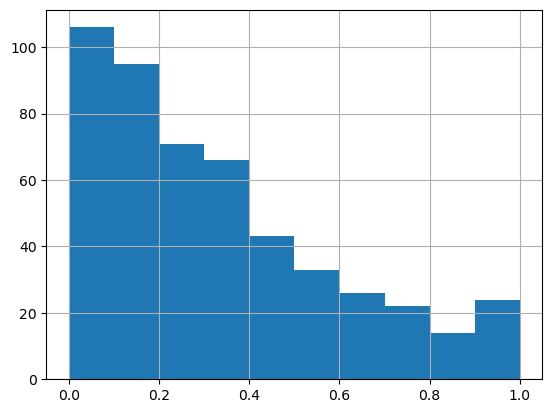

In [19]:
pldb["pldbScore_scaled"].hist() # The original distribution

<Axes: >

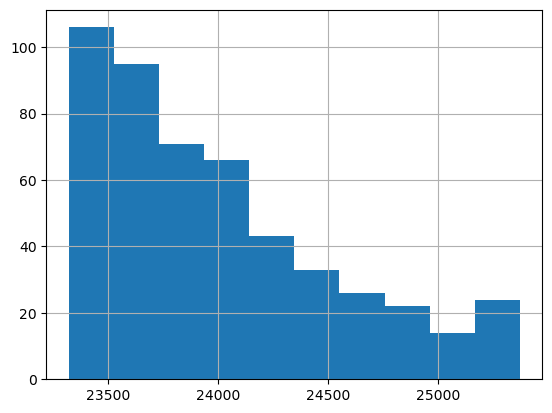

In [20]:
pldb["pldbScore"].hist() # The original distribution 

## Boolean Aggregators: **.any() and *.all()

We can use the aggregators [**.any()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html#pandas.DataFrame.any) and [**.all()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.all.html#pandas.DataFrame.all) to manipulate the Boolean arrays (like those returned by **.isna()** or **.notna()** to answer questions about the frequency of null values in DataFrames. 

In [21]:
pldb.isna()

,name,appeared,creators,maintainers,measurements,tags,rijuRepl_website,website,spec,foundationScore,blog,releaseNotes,download,latestVersion,exampleCount,rank,lastActivity,writtenInCount,pldbScore,meetup_memberCount,pldbScore_scaled
id,,,,,,,,,,,,,,,,,,,,,
javascript,False,False,False,True,False,False,True,True,False,False,True,True,True,False,False,False,True,True,False,False,False
c,False,False,False,True,False,False,True,True,False,False,True,True,True,False,False,False,True,True,False,False,False
python,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
java,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
cpp,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dat-protocol,False,False,False,True,False,False,True,False,True,False,True,True,True,False,False,False,True,False,False,True,False
mariadb,False,False,True,True,False,False,True,True,True,False,True,True,True,True,False,False,True,True,False,True,False
sourcepawn,False,False,True,True,False,False,True,True,True,False,True,True,True,True,False,False,True,False,False,True,False


First, let's manipulate this array to find out which columns have *at least* one null value. The **axis** parameter is extremely important in Pandas but a little tricky.

It represents which axis should be **reduced**, which means that aggregating by index=0 (index) will produce one value for each *column*, which aggregating by index=1 (column) will produce one value for each *row*.

When values are aggregated across the index axis, one aggregate value is generated for each *column*.

In [22]:
pldb.isna().any(axis="index")

name                  False
appeared              False
creators               True
maintainers            True
measurements          False
tags                  False
rijuRepl_website       True
website                True
spec                   True
foundationScore       False
blog                   True
releaseNotes           True
download               True
latestVersion          True
exampleCount          False
rank                  False
lastActivity           True
writtenInCount         True
pldbScore             False
meetup_memberCount     True
pldbScore_scaled      False
dtype: bool

Conversely, when values are aggregated across the columns axis, one aggregate value is for each index (or row).

In [23]:
pldb.isna().any(axis="columns") # Roll across columns = one per row

id
javascript      True
c               True
python          True
java            True
cpp             True
                ... 
dat-protocol    True
mariadb         True
sourcepawn      True
io              True
qalb            True
Length: 500, dtype: bool

We can use this same principle to count the number of NaNs per row.

In [24]:
pldb.isna().sum(axis="columns")

id
javascript       8
c                8
python           3
java             3
cpp              5
                ..
dat-protocol     8
mariadb         12
sourcepawn      11
io               9
qalb             9
Length: 500, dtype: int64

Or the total number of NaNs per column.

In [25]:
pldb.isna().sum(axis="index")

name                    0
appeared                0
creators              140
maintainers           498
measurements            0
tags                    0
rijuRepl_website      481
website               106
spec                  471
foundationScore         0
blog                  435
releaseNotes          439
download              461
latestVersion         244
exampleCount            0
rank                    0
lastActivity          500
writtenInCount        207
pldbScore               0
meetup_memberCount    444
pldbScore_scaled        0
dtype: int64

### Aggregation Task: Feature Coverage
A common task in data analysis is *feature coverage* computation, which can be defined as the number of non-null values per variable (rows) divided by the number of observations (rows). 

A feature with perfect coverage will have 1, a feature with only nulls will be 1.

Let's say you want to compute the feature coverage of the `pldb` DataFrame in order to decide which features are good candidates for statistical learning tasks.

First, let's get the number of rows in our pldb DataFrame using `.shape`.

In [26]:
n_rows = pldb.shape[0] # Rows first, then columns, so we want the [0] (first) value
print(n_rows, pldb.shape)

500 (500, 21)


Now, let's the get the total (sum) of the number of not null (notna) values per column in the DataFrame.

In [27]:
pldb.notna() # Now let's sum this for each COLUMN

,name,appeared,creators,maintainers,measurements,tags,rijuRepl_website,website,spec,foundationScore,blog,releaseNotes,download,latestVersion,exampleCount,rank,lastActivity,writtenInCount,pldbScore,meetup_memberCount,pldbScore_scaled
id,,,,,,,,,,,,,,,,,,,,,
javascript,True,True,True,False,True,True,False,False,True,True,False,False,False,True,True,True,False,False,True,True,True
c,True,True,True,False,True,True,False,False,True,True,False,False,False,True,True,True,False,False,True,True,True
python,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True
java,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True
cpp,True,True,True,False,True,True,False,True,True,True,True,True,False,True,True,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dat-protocol,True,True,True,False,True,True,False,True,False,True,False,False,False,True,True,True,False,True,True,False,True
mariadb,True,True,False,False,True,True,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True
sourcepawn,True,True,False,False,True,True,False,False,False,True,False,False,False,False,True,True,False,True,True,False,True


In [28]:
pldb.notna().sum(axis="index").head()

name            500
appeared        500
creators        360
maintainers       2
measurements    500
dtype: int64

We're almost there! Now, we need to divide by the number of rows in the DataFrame, which we already computed as `n_rows`. Because operations on DataFrames and Series are *vectorized*, this will divide each integer in the series by that scalar value.

In [29]:
coverage = pldb.notna().sum(axis="index")/n_rows
coverage

name                  1.000
appeared              1.000
creators              0.720
maintainers           0.004
measurements          1.000
tags                  1.000
rijuRepl_website      0.038
website               0.788
spec                  0.058
foundationScore       1.000
blog                  0.130
releaseNotes          0.122
download              0.078
latestVersion         0.512
exampleCount          1.000
rank                  1.000
lastActivity          0.000
writtenInCount        0.586
pldbScore             1.000
meetup_memberCount    0.112
pldbScore_scaled      1.000
dtype: float64

Finally, let's sort this series using **.sort_values()**.

In [30]:
coverage.sort_values()

lastActivity          0.000
maintainers           0.004
rijuRepl_website      0.038
spec                  0.058
download              0.078
meetup_memberCount    0.112
releaseNotes          0.122
blog                  0.130
latestVersion         0.512
writtenInCount        0.586
creators              0.720
website               0.788
pldbScore             1.000
rank                  1.000
name                  1.000
foundationScore       1.000
tags                  1.000
measurements          1.000
appeared              1.000
exampleCount          1.000
pldbScore_scaled      1.000
dtype: float64

## Plotting with **DataFrame.plot()**

Pandas has a built-in plotting library [**DataFrame.plot()**](https://pandas.pydata.org/docs/user_guide/visualization.html) made from matplotlib.pyplot that we can use to generate quick visualizations from DataFrames.

Let's say we want to do a bar plot with the top five programming languages with `"name"` on the x-axis and `"meetup_MemberCount"` on the y.

First, select the rows you want to plot. We can't do a categorical plot with all 500!

In [31]:
top_five = pldb.iloc[0:5]

Select two columns in x, y order, then plot.

<Axes: xlabel='id'>

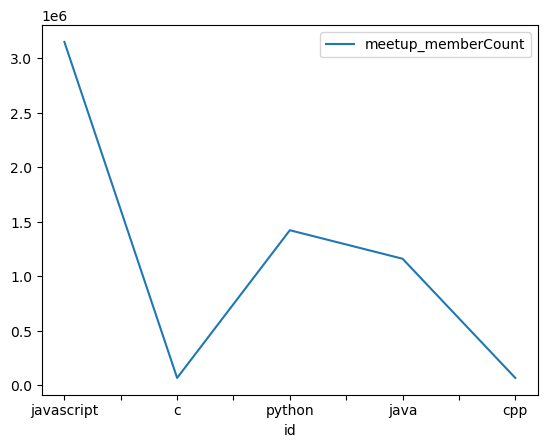

In [32]:
top_five.loc[:, ["name", "meetup_memberCount"]].plot()

Because the x-axis represents a categorical variable (language) rather than a continuous one like time, a bar plot is more appropriate for this data than the default line graph. Pass the `kind="bar"` argument into **.plot()**.

<Axes: xlabel='id'>

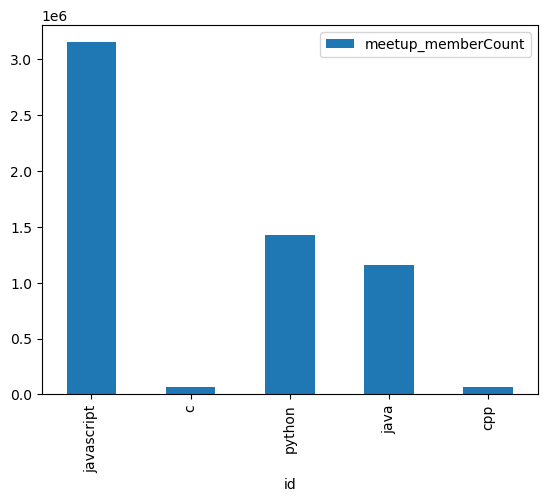

In [33]:
top_five.loc[:, ["name", "meetup_memberCount"]].plot(kind="bar")

## Writing and Applying Functions

Now that you have sense of how the *axis* parameter works in a DataFrame, keep it mind as you learn how to apply your own functions.

### Processing JSON Files in Pandas: An Example API

First, let's look at the structure of an example JSON query result in both the browser and in Python. Today, we'll be focusing on statistics regarding the usage and expenditures of public libraries in Oregon.

This [Oregon Public Library Stastistics API](https://dev.socrata.com/foundry/data.oregon.gov/8zw7-zgjw) queries a database and retrieves all entries (that fit within a single JSON) that meet the selection requirements. The following query [https://data.oregon.gov/resource/8zw7-zgjw.json?year=2023](https://data.oregon.gov/resource/8zw7-zgjw.json?year=2023) returns information about public libraries in Oregon in the year 2023.

When opening the query in a browser like Firefox, you will notice that it like a **list** of **dictionaries**.

### Reading JSONS

Pandas supports conversion of JSON files to DataFrames through the [**pd.read_json()**](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html) function. Parsing JSON files with nested structure will require more tuning of parameters, but the default arguments will work for this simple API.

In [34]:
URL = "https://data.oregon.gov/resource/8zw7-zgjw.json?year=2023"
libraries = pd.read_json(URL)
libraries.head()

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueerate,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsinpersononsite,programsinpersononsiteat,programsinpersonoffsite,programsinpersonoffsitea,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,techwebsitevisits,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages
0,OR0040,2023,Adams Public Library,190 MAIN ST,Adams,97810,P.O. BOX 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,227.0,23.0,0.00,0.00,0.50,0,0,False,False,0,0,1,0,0,0,46487,1000,0,"$2,000",0,28680,0,0,0,0,27985,0,3440,0,0,10567,0,0,0,3642,301,345,8,755,78,15,1,60044,10916,924,250,37391,5254,0,0,0,0,0,0,0,2008,0,0,22,0,0,0,374.0,192.0,464.0,171.0,732.0,257.0,1.0,1.0,848.0,649.0,622.0,0,381,428,630,656,0.0,"N/A (we provide reference services, but we do ...",67.0,True,182,384,91.0,192.0,91.0,192.0,9.0,75.0,12.0,60.0,91.0,192.0,91.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,45.0,304.0,Actual count (we track each transaction as it ...,3,Wi-Fi extends outside building (left on 24/7),N/A (we don'

## Plotting Two Continuous Variables: Scatterplots with **.plot.scatter()**

We can use the **.plot.scatter()** function to plot two *continuous* variables against one another by passing in `x=` and `y=` arguments. Remember to put column names in quotes.

Let's say we want to look at the relationship between `circadult` (book checkouts for adults) and `collectionbooksadded` (books purchased for a collection in 2023) for libraries in Oregon serving at least 1000 registered users.

<Axes: xlabel='circadult', ylabel='collectionbooksadded'>

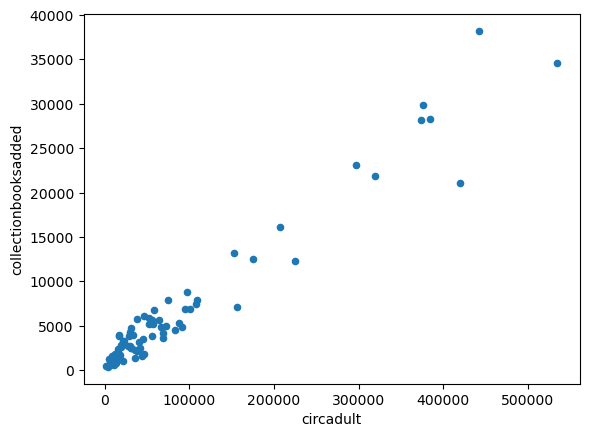

In [35]:
libraries[libraries["registeredusers"] > 1000].plot.scatter(x="circadult", y="collectionbooksadded")

## Using Vectorized Functions on Series with Series.apply()

To apply a function to *each* value in a column, you need the [**pd.Series.apply**](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html#pandas.Series.apply) method. Given the *name* of a function for that returns one output value for one input value, it **vectorizes** that function over the column (or row).

### Series.apply() with Functions from Modules

To start, let's practice applying functions that have already been written. For common operations like summing, computing logarithms, or statistical measures, don't bother reinventing the wheel.

<Axes: >

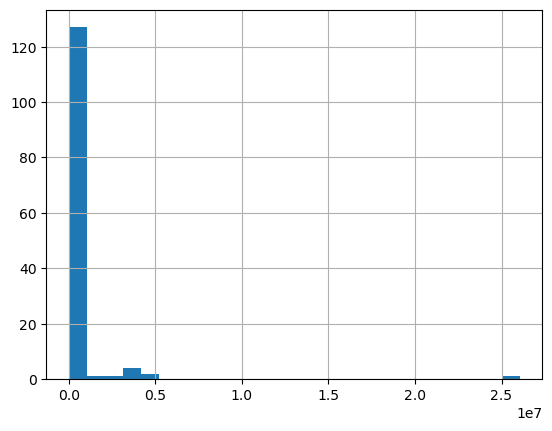

In [36]:
libraries["expendituresotheroperating"].hist(bins=25)

For modeling purposes, we might to *scale* a highly irregular variable using a logarithmic function. Luckily, the standard Python math module has [logarithmic functions](https://docs.python.org/3/library/math.html#math.log2) like **log2** available.

In [37]:
from math import log2 # log base 2
print(log2(8))
print(log2(256))

3.0
8.0


Because the logarithmic function will not work on 0s or NaNs (by definition), let's focus only libraries with nonzero operating costs using boolean indexing and rename that slice to `nonzero_costs`. You can see that even filtering out those 0s and NaNs gives us an extremely lopsided distribution.

<Axes: >

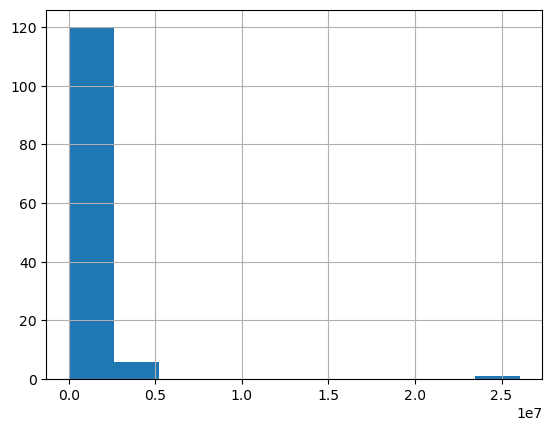

In [38]:
nonzero_costs = libraries[libraries["expendituresotheroperating"] > 0]
nonzero_costs["expendituresotheroperating"].hist()

Pass in the function by name. We do not use parentheses because **.apply()** will call the function on each value in the column individually for us.

In [39]:
nonzero_costs["expendituresotheroperating"].apply(log2)

0      13.367278
1      13.070624
2      19.644110
3      17.620048
4       7.643856
         ...    
131    17.733849
132    12.308055
133    17.819019
134    13.990015
135    11.822571
Name: expendituresotheroperating, Length: 127, dtype: float64

Let's run another histogram to see how logarithmic scaling changes the shape of the distribution.

<Axes: >

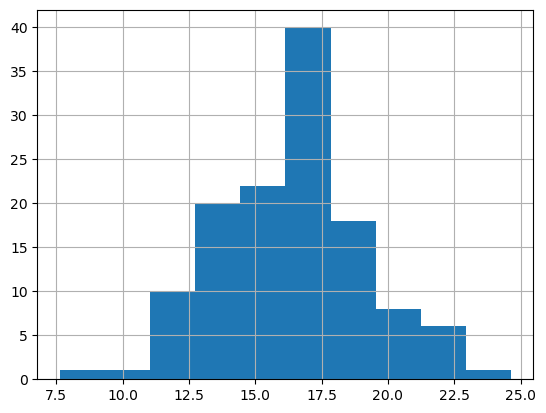

In [40]:
nonzero_costs["expendituresotheroperating"].apply(log2).hist()

### Designing a Function: Finding Custom Values in a String

Let's say you're interested in studying community for East Asian languages in public libraries in Oregon. You are interested in whether libraries stock materials in East Asian languages, namely Chinese (Cantonese or Mandarin), Korean, and Japanese. Inspecting each value in the `"collectionotherlanguages"` field is not practical. You need a function that (when vectorized) returns True if one or more strings of `["Chinese", "Mandarin", "Cantonese", "Korean", "Japanese"]` is present.

To develop a function from scratch, you need to know the expected input and output. From there, develop a *process* to get the output you want from the inputs in your DataFrame.

Let's write a quick function that takes in a single value from the `collectionotherlanguages` column and returns a Boolean.

In [41]:
# Helper function to determine if a library has East Asian materials
def has_east_asian_cols(s): # Single string as input
    if pd.isna(s): # If is NaN
        return False
    ea_languages = ["Chinese", "Mandarin", "Cantonese", "Korean", "Japanese", "Vietnamese"]
    for lang in ea_languages:
        if lang in s:
            return True
    return False

Before we apply it our DataFrame, let's test it on a few sample input values. We want to test at least one `True` case and at least one `False` case.

In [42]:
print(has_east_asian_cols("Arabic;Chinese"))
print(has_east_asian_cols("French"))
print(has_east_asian_cols("French"))

True
False
False


In [43]:
libraries["collectionotherlanguages"].apply(has_east_asian_cols)

0      False
1      False
2      False
3       True
4      False
       ...  
131     True
132     True
133    False
134    False
135     True
Name: collectionotherlanguages, Length: 136, dtype: bool

We can sum this Boolean array to determine how many public libraries in Oregon have East Asian materials.

In [44]:
libraries["collectionotherlanguages"].apply(has_east_asian_cols).sum()

55

Now that we're satisfied with this column, let's add it as a new column called `has_ea_cols` to the `lib_subset` DataFrame.

In [45]:
libraries["has_ea_cols"] = libraries["collectionotherlanguages"].apply(has_east_asian_cols)
libraries

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueerate,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsinpersononsite,programsinpersononsiteat,programsinpersonoffsite,programsinpersonoffsitea,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,techwebsitevisits,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,has_ea_cols
0,OR0040,2023,Adams Public Library,190 MAIN ST,Adams,97810,P.O. BOX 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,227.0,23.0,0.00,0.00,0.50,0,0,False,False,0,0,1,0,0,0,46487,1000,0,"$2,000",0,28680,0,0,0,0,27985,0,3440,0,0,10567,0,0,0,3642,301,345,8,755,78,15,1,60044,10916,924,250,37391,5254,0,0,0,0,0,0,0,2008,0,0,22,0,0,0,374.0,192.0,464.0,171.0,732.0,257.0,1.0,1.0,848.0,649.0,622.0,0,381,428,630,656,0.0,"N/A (we provide reference services, but we do ...",67.0,True,182,384,91.0,192.0,91.0,192.0,9.0,75.0,12.0,60.0,91.0,192.0,91.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,45.0,304.0,Actual count (we track each transaction as it ...,3,Wi-Fi extends outside building (left on 24/7),

Now that we have a dedicated column, we can group the libraries by whether or not they have East Asian questions using [**groupby**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby). 
For example, do the libraries with more diverse collections serve more `registeredusers`? We can test by getting the median of the two groups.

In [46]:
libraries.groupby("has_ea_cols")["registeredusers"].median()

has_ea_cols
False    1512.5
True     7914.5
Name: registeredusers, dtype: float64

Grouping allows us to group data by a variable, then aggregate those groups.

In [47]:
libraries.groupby("county")["librarianstotal"].sum()

county
Baker           3.00
Benton         13.88
Clackamas      71.82
Clatsop         8.00
Columbia        8.80
Coos           19.40
Crook           7.00
Curry           5.35
Deschutes      20.80
Douglas         5.40
Gilliam         2.20
Grant           1.55
Harney          1.69
Hood River      4.60
Jackson        25.00
Jefferson       4.25
Josephine       2.00
Klamath         3.00
Lake            1.00
Lane           47.00
Lincoln        15.20
Linn           14.38
Malheur         4.10
Marion         21.00
Morrow          7.05
Multnomah      63.25
Polk            7.80
Sherman         1.00
Tillamook       5.00
Umatilla       11.68
Union           6.80
Wallowa         2.10
Wasco           2.10
Washington    106.43
Wheeler         0.30
Yamhill        19.41
Name: librarianstotal, dtype: float64

### Edge Case: Functions that Take in More than One Argument

Let's say you want to apply that takes in an additional argument. For example, the **math.log** functions takes in a second argument representing the base of the logarithm.

In [48]:
from math import log
log(100, 10) # log base 10 of 100

2.0

Let's say you want to get the log base 10 of the `"facilitiessqfttotal"` column. Pass additional arguments to the **.apply()** function by using the `args=` parameter.

In [49]:
libraries["facilitiessqfttotal"].apply(log, args=(10,))

0      2.628389
1      2.937016
2      4.691700
3      3.970812
4      2.982271
         ...   
131    4.457534
132    3.571243
133    4.340008
134    3.375846
135    3.622421
Name: facilitiessqfttotal, Length: 136, dtype: float64

## Aggregating Rows or Columns with DataFrame.apply()

What if you wanted to operate on a DataFrame by aggregating across columns or rows? What if you want an entire column or row as input? That's where the powerful and flexible [**DataFrame.apply()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) function comes in.

The input to **DataFrame.apply()** depends on whether you pass in a row `axis="columns"` or a column `axis="index"`.

## Aggregating with Functions Along Columns

When passing in a row, you can refer to specific values within the DataFrame using column names.

In [50]:
# Returns a boolean given a **row** in a DataFrame 
def has_fines(row):
    if row["finesadultmaterials"] == "Yes" or row["finesyamaterials"] == "Yes" or row["fineschildrensmaterials"] == "Yes":
        return True
    return False

In [51]:
libraries.apply(has_fines, axis="columns") 

0      False
1      False
2      False
3      False
4       True
       ...  
131     True
132     True
133    False
134    False
135     True
Length: 136, dtype: bool

When we're satisfied with the results, we can assign it back to the parent DataFrame to create a new column.

In [52]:
libraries["has_fines"] = libraries.apply(has_fines, axis="columns")
libraries["has_fines"].value_counts()

has_fines
False    92
True     44
Name: count, dtype: int64

<Axes: xlabel='has_fines'>

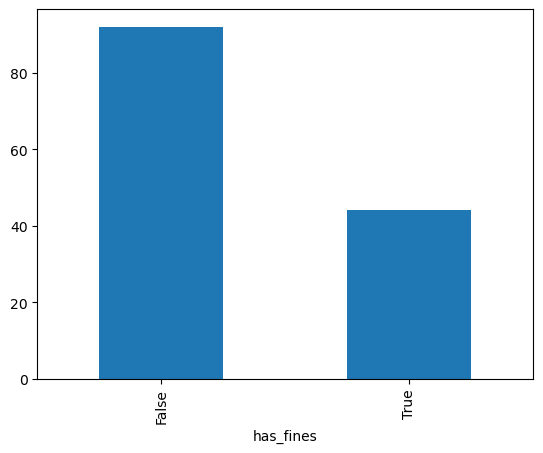

In [53]:
libraries["has_fines"].value_counts().plot(kind="bar")

## Aggregating with Functions on Rows

By switching our `axis` argument to `index`, we can write functions that take in columns instead. Remember that you will need to use either functions that take in vectorized input or functions that reference specific rows. Let's practice with **numpy**'s standard deviation function [**np.std()**](https://numpy.org/doc/stable/reference/generated/numpy.std.html) to compute the standard deviation of each **numeric** column in the `libraries` DataFrame.

In [54]:
import numpy as np
def standard_deviation(col):
    # We need to return np.Nan for all categorical columns
    if col.dtype == 'object' or col.dtype == 'Categorical':
        return np.nan
    return np.std(col) # Returns the standard deviation of a column

In [55]:
libraries.apply(standard_deviation, axis="index").dropna()

year                          0.000000
zip                         284.568765
mailingzip                  284.568765
centrallibrary                0.085433
branches                      2.311012
                             ...      
referencetransactions      9685.120782
techwifisessions         393961.114264
feesnonresident              39.611534
has_ea_cols                   0.490778
has_fines                     0.467823
Length: 139, dtype: float64

### Multi-Hots

**Bonus**: Interested in statistics or machine learning? It's so common for raw data to represented in that awkward `;` or `,` separated format that Pandas has a built-in way to convert one **Series** with multiple categorical values into a **DataFrame** of binary variables. If there are *n* possible categorical features, this will create *n* binary variables. This [**Series.str.get_dummies()**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html#pandas.Series.str.get_dummies) function for creating dummy variables is also called a multi-hot. It's essential when working with models that require numeric features, as it translates strings into 0s and 1s.



In [56]:
libraries["collectionotherlanguages"].str.get_dummies(sep=";")

,Arabic,Chinese (including Mandarin & Cantonese),French,German,Hindi,"Ilocano, Samoan or Hawaiian",Japanese,Korean,Mam,Marshallese,Russian,Somali,Swahili,Tagalog,"Thai, Lao",Ukrainian,Vietnamese,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1
132,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
133,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Want to add this back into the `libraries` DataFrame as 18 new variables? We can use **pd.concat()** to combine the DataFrames along the **columns** axis.

In [57]:
lang_multi_hot = libraries["collectionotherlanguages"].str.get_dummies(sep=";")
pd.concat([libraries, lang_multi_hot], axis="columns") # We need to wrap our input DataFrames in a list

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueerate,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsinpersononsite,programsinpersononsiteat,programsinpersonoffsite,programsinpersonoffsitea,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,techwebsitevisits,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,has_ea_cols,has_fines,Arabic,Chinese (including Mandarin & Cantonese),French,German,Hindi,"Ilocano, Samoan or Hawaiian",Japanese,Korean,Mam,Marshallese,Russian,Somali,Swahili,Tagalog,"Thai, Lao",Ukrainian,Vietnamese,other
0,OR0040,2023,Adams Public Library,190 MAIN ST,Adams,97810,P.O. BOX 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,227.0,23.0,0.00,0.00,0.50,0,0,False,False,0,0,1,0,0,0,46487,1000,0,"$2,000",0,28680,0,0,0,0,27985,0,3440,0,0,10567,0,0,0,3642,301,345,8,755,78,15,1,60044,10916,924,250,37391,5254,0,0,0,0,0,0,0,2008,0,0,22,0,0,0,374.0,192.0,464.0,171.0,732.0,257.0,1.0,1.0,848.0,649.0,622.0,0,381,428,630,656,0.0,"N/A (we provide reference services, but we do ...",67.0,Tru

In [58]:
libraries = pd.concat([libraries, lang_multi_hot], axis="columns") # We need to wrap our input DataFrames in a list

Let's use another convenient function to clean up our data: [**Series.str**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html#pandas.Series.str) methods  perform quick string-based operations like replacing patterns and adjusting casing. We can apply these functions to make casing consistent across features, as languages like `French` are capitalized.

First, let's make the Chinese column more concise using **.rename()** and the following mapping: `{"Chinese (including Mandarin & Cantonese)":"Chinese"}`.

In [59]:
libraries.rename(columns={"Chinese (including Mandarin & Cantonese)":"Chinese"})

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueerate,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsinpersononsite,programsinpersononsiteat,programsinpersonoffsite,programsinpersonoffsitea,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,techwebsitevisits,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,has_ea_cols,has_fines,Arabic,Chinese,French,German,Hindi,"Ilocano, Samoan or Hawaiian",Japanese,Korean,Mam,Marshallese,Russian,Somali,Swahili,Tagalog,"Thai, Lao",Ukrainian,Vietnamese,other
0,OR0040,2023,Adams Public Library,190 MAIN ST,Adams,97810,P.O. BOX 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,227.0,23.0,0.00,0.00,0.50,0,0,False,False,0,0,1,0,0,0,46487,1000,0,"$2,000",0,28680,0,0,0,0,27985,0,3440,0,0,10567,0,0,0,3642,301,345,8,755,78,15,1,60044,10916,924,250,37391,5254,0,0,0,0,0,0,0,2008,0,0,22,0,0,0,374.0,192.0,464.0,171.0,732.0,257.0,1.0,1.0,848.0,649.0,622.0,0,381,428,630,656,0.0,"N/A (we provide reference services, but we do ...",67.0,True,182,384,91.0,192.0,91.0,192.0,9

Once that looks good, let's apply that to the `libraries` DataFrame by assigning that copy back to `libraries`.

In [60]:
libraries = libraries.rename(columns={"Chinese (including Mandarin & Cantonese)":"Chinese"})

Once that looks good, let's apply that to the `libraries` DataFrame by assigning that copy back to `libraries`.

Let's test by summing our new, renamed column.

In [61]:
libraries["Chinese"].sum() # There are this many libraries in Oregon with Chinese-language collections

52

Let's say I want to find out **how man** libraries per county offer materials in each of the following languages: Japanese, Korean, Chinese, and Vietnamese. We can use **groupby** and **aggregation** to count the number of rows (libraries) that offer materials in each language per county.

In [62]:
libraries[["county", "Japanese", "Korean", "Chinese", "Vietnamese"]].groupby("county").sum()

,Japanese,Korean,Chinese,Vietnamese
county,,,,
Baker,0,0,1,0
Benton,1,1,1,0
Clackamas,9,9,9,9
Clatsop,0,0,0,0
Columbia,1,2,2,0
Coos,4,2,4,1
Crook,0,0,1,0
Curry,3,3,3,1
Deschutes,0,0,0,0


This is all well and good, but, for plotting purposes, I want to filter out counties that have no East Asian language materials whatsoever.
Let's create a boolean index that identifies rows that sum to **more than 0**. We will need to use an *axis* argument to sum up along the columns for this.

In [63]:
by_county = libraries[["county", "Japanese", "Korean", "Chinese", "Vietnamese"]].groupby("county").sum()
by_county.sum(axis="columns") > 0

county
Baker          True
Benton         True
Clackamas      True
Clatsop       False
Columbia       True
Coos           True
Crook          True
Curry          True
Deschutes     False
Douglas        True
Gilliam       False
Grant         False
Harney        False
Hood River    False
Jackson        True
Jefferson     False
Josephine      True
Klamath        True
Lake          False
Lane           True
Lincoln        True
Linn          False
Malheur        True
Marion        False
Morrow        False
Multnomah      True
Polk          False
Sherman       False
Tillamook     False
Umatilla      False
Union          True
Wallowa        True
Wasco         False
Washington     True
Wheeler       False
Yamhill        True
dtype: bool

Applying this index reduces to `by_county` gives us a subset that only includes counties with at least one East Asian language.

In [64]:
by_county[by_county.sum(axis="columns") > 0]

,Japanese,Korean,Chinese,Vietnamese
county,,,,
Baker,0,0,1,0
Benton,1,1,1,0
Clackamas,9,9,9,9
Columbia,1,2,2,0
Coos,4,2,4,1
Crook,0,0,1,0
Curry,3,3,3,1
Douglas,5,3,5,2
Jackson,1,1,1,0


Let's plot this information with a bar chart. Remember to label and title appropriately.

<Axes: title={'center': 'East Asian Language Collections in Oregon Public Libraries'}, xlabel='County', ylabel='Libraries'>

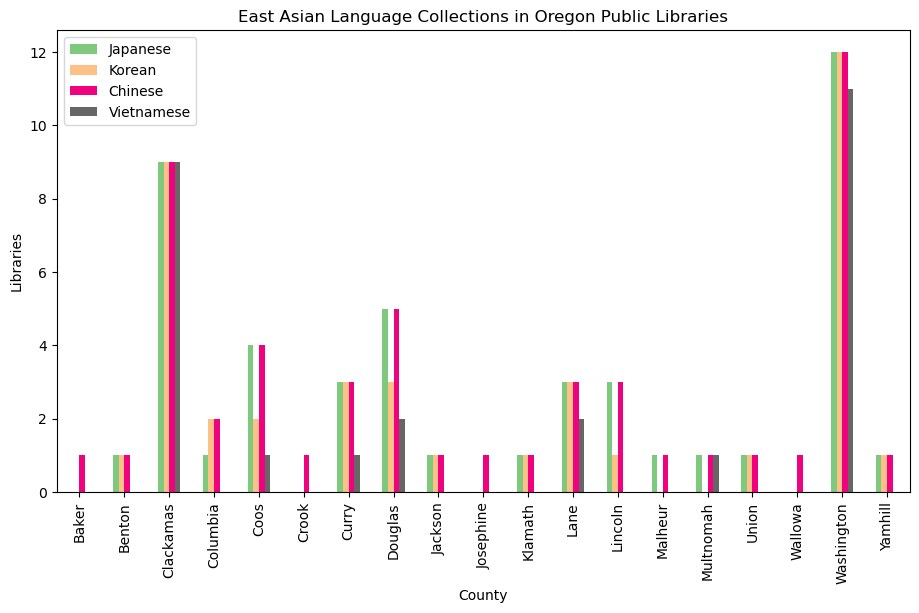

In [65]:
by_county[by_county.sum(axis="columns") > 0].plot(kind="bar", 
                                                  figsize=(11,6),
                                                  title="East Asian Language Collections in Oregon Public Libraries",
                                                  xlabel="County",
                                                  ylabel="Libraries",
                                                  colormap="Accent"
                                                 )

## Bonus: Concatenating DataFrames
Most APIs return a limited number of rows per query, as APIs are designed to transmit small pieces of data at a time over the internet. Therefore, in order to get a full picture of the data, you will need to make several calls.

We're going to use the "year" parameter to get one year's worth of data at a time, just as we did for 2023, but now we're going to get the data for 2024, 2022, 2021, 2020, 2019, and 2018 as well.

In [1]:
import time
base_url = "https://data.oregon.gov/resource/8zw7-zgjw.json?year="
years = ["2024", "2023", "2022", "2021", "2020", "2019", "2018"]
data = []

# Constructing the loop, identify what needs to change (the year)
for year in years:
    query_url = base_url + year # creates a valid url
    print("Getting data from", query_url) # test the url
    frame = pd.read_json(query_url) # read the JSON to a DataFrame
    data.append(frame) # Add the DataFrame to a list
    time.sleep(2)
    print("Waiting two seconds to be polite.")

Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2024


NameError: name 'pd' is not defined

Once you have a working list of DataFrames, you can concatenate them into one DataFrame named `all_libraries` using [**pd.concat**](https://pandas.pydata.org/docs/reference/api/pandas.concat.html).
Remember, you need to specify a list **AND** an axis for concatenation to work as intended. This operation is only safe to do because we know that each successive set of rows *has the same columns* as the parent.

In [ ]:
all_libraries = pd.concat(data, axis="index")

The combined `all_libraries` DataFrame has 965 rows, representing 7 years of statistics. 

In [ ]:
all_libraries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 0 to 136
Columns: 181 entries, libid to facilitiesconstructiondate
dtypes: bool(1), float64(126), int64(13), object(41)
memory usage: 1.3+ MB


Let's make a graph plotting revenue sources for public libraries on Oregon over the past seven years.

First, group by `"year"`, select the revenue columns, then plot the *median* value for each.

<Axes: xlabel='year'>

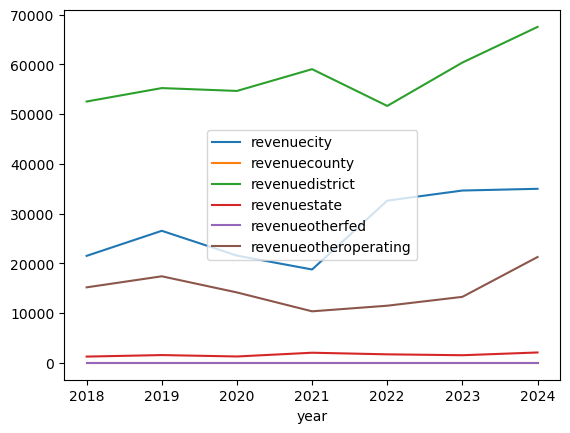

In [ ]:
all_libraries.groupby("year")[[
    "revenuecity","revenuecounty","revenuedistrict", "revenuestate", "revenueotherfed", "revenueotheroperating"]].median().plot()